In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(x_train,y_train),(x_test,y_test)= datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

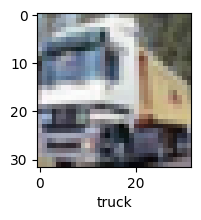

In [9]:
plot_sample(x_train,y_train,1)

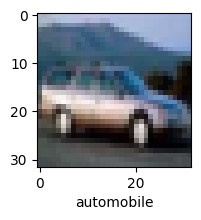

In [10]:
plot_sample(x_train,y_train,4)

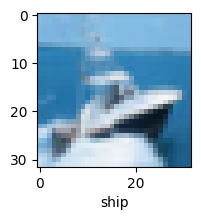

In [11]:
plot_sample(x_train,y_train,8)

In [12]:
x_train=x_train/255
x_test=x_test/255

In [13]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])

ann.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

ann.fit(x_train,y_train,epochs=5)


C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.3009 - loss: 1.9375
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.4178 - loss: 1.6506
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.4543 - loss: 1.5549
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.4768 - loss: 1.4886
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.4972 - loss: 1.4299


In [14]:
ann.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4915 - loss: 1.4582


[1.4672950506210327, 0.4878000020980835]

In [15]:
from sklearn.metrics import confusion_matrix ,classification_report
import numpy as np
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print("classification report:  \n",classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
classification report:  
               precision    recall  f1-score   support

           0       0.69      0.41      0.52      1000
           1       0.66      0.57      0.61      1000
           2       0.36      0.35      0.35      1000
           3       0.33      0.41      0.36      1000
           4       0.37      0.49      0.42      1000
           5       0.40      0.38      0.39      1000
           6       0.51      0.56      0.54      1000
           7       0.53      0.56      0.55      1000
           8       0.68      0.56      0.62      1000
           9       0.56      0.58      0.57      1000

    accuracy                           0.49     10000
   macro avg       0.51      0.49      0.49     10000
weighted avg       0.51      0.49      0.49     10000



In [24]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
     
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])


In [28]:
cnn.fit(x_train, y_train, epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.3807 - loss: 1.6982
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.5896 - loss: 1.1622
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6479 - loss: 1.0107
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6849 - loss: 0.9163
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7092 - loss: 0.8469
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.7304 - loss: 0.7787
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.7479 - loss: 0.7332
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7583 - loss: 0.6911
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7753 - loss: 0.6449
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7894 - loss: 0.6000


In [30]:
cnn.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6904 - loss: 0.9505


[0.962452232837677, 0.6883999705314636]

In [34]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

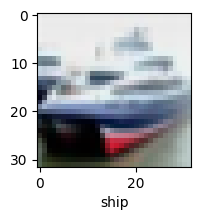

In [36]:

y_test=y_test.reshape(-1, )
plot_sample(x_test, y_test, 1)

In [37]:
y_pred=cnn.predict(x_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[5.70687756e-04, 1.33798074e-03, 5.94853517e-03, 7.64167368e-01,
        4.75999201e-04, 2.12309331e-01, 1.34547316e-02, 2.32613209e-04,
        6.07497495e-05, 1.44206767e-03],
       [1.20126735e-03, 2.83640802e-01, 6.50673155e-06, 2.06606796e-06,
        1.11169868e-07, 3.39058431e-07, 1.15918777e-08, 3.31684646e-07,
        7.02308416e-01, 1.28401602e-02],
       [4.93707955e-02, 2.72936106e-01, 1.15510095e-02, 2.63960082e-02,
        2.03775475e-03, 1.87648367e-02, 2.09803038e-04, 5.08693233e-03,
        4.13162589e-01, 2.00484127e-01],
       [7.83871591e-01, 1.63849331e-02, 8.29766542e-02, 1.50862513e-02,
        4.08388302e-02, 1.63039454e-04, 1.71693508e-04, 1.06292369e-03,
        2.68436652e-02, 3.26004252e-02],
       [6.29057354e-07, 5.39478933e-05, 1.40597729e-03, 5.19963130e-02,
        6.43518984e-01, 5.51964995e-03, 2.97471613e-01, 1.08037398e-06,
        2.34250565e-05, 8.32970272e-06]], dtype=float32)

In [38]:
y_classes=[np.argmax(element)for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [39]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

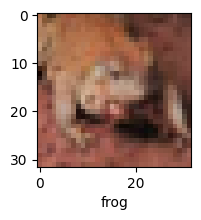

In [42]:
plot_sample(x_test, y_test, 5)

In [43]:
classes[y_classes[5]]

'frog'

In [44]:
print("classification report: \n",classification_report(y_test,y_classes))

classification report: 
               precision    recall  f1-score   support

           0       0.77      0.65      0.71      1000
           1       0.85      0.77      0.81      1000
           2       0.63      0.52      0.57      1000
           3       0.48      0.61      0.54      1000
           4       0.62      0.66      0.64      1000
           5       0.71      0.47      0.57      1000
           6       0.74      0.79      0.76      1000
           7       0.65      0.83      0.73      1000
           8       0.86      0.72      0.79      1000
           9       0.71      0.85      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000

